## Analyse Domains on Videos

In our previous analysis, we analyse domains without taking into account their occurence and popularity on YouTube. In this notebook, we deepen our analysis of the domains by taking into account the occurrence of the domains on YouTube. We proceed as follows:

1. We add weights to the domains based on the number of videos they appear in.

2. We perform a similar analysis as in the previous [notebook](../analysis/domains_analysis.ipynb) with the weighted domains.

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

### Domain Analysis on Popular Weighted Domains

In [17]:
PATH_METADATAS_TOP_COUNTS_SRC = "../data/domains_classification.csv"

In [18]:
domains_top_classified = pd.read_csv(PATH_METADATAS_TOP_COUNTS_SRC)
domains_top_classified.domain_category = domains_top_classified.domain_category.astype("category")
domains_top_classified.is_sponsored = domains_top_classified.is_sponsored.astype(bool)

In [19]:
domains_top_classified.head(20)

,domain,count,median_sponsor_score,is_sponsored,domain_category
0,plus.google.com,3786647,3.0,False,Social Media
1,play.google.com,2093786,4.0,True,Application
2,itunes.apple.com,1724603,3.0,False,Music
3,bit.ly,1408414,3.0,False,Shorten
4,tinyurl.com,1380122,4.0,False,Shorten
5,rstyle.me,1175073,11.0,True,Agency
6,steamcommunity.com,824573,3.0,False,Video Game
7,creativecommons.org,767740,4.0,False,Education
8,smarturl.it,750397,3.0,False,Shorten
9,po.st,739548,4.0,True,Agency


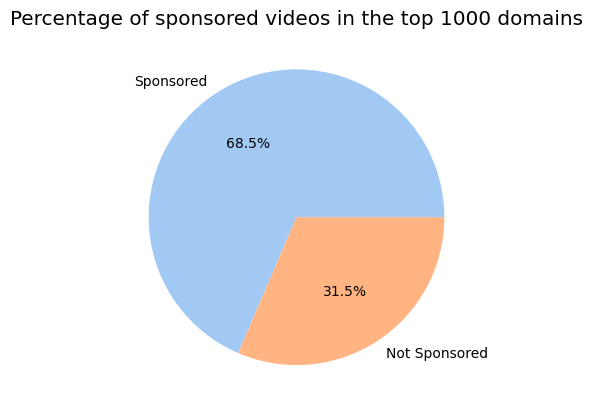

In [20]:
domains_count = domains_top_classified.groupby("is_sponsored")["count"].agg(["sum"]).values.reshape(-1,)

colors = sns.color_palette('pastel')
plt.title('Percentage of sponsored videos in the top 1000 domains')
plt.pie(domains_count, labels=["Sponsored", "Not Sponsored"], autopct="%1.1f%%", colors=colors)
plt.show()

We can see that, compared to [the domains analysis](../analysis/domains_analysis.ipynb), the proportion of sponsored videos is the total inverse of the proportion of sponsoring domains ($27\%$ of sponsoring domains v.s. $68.5\%$ of sponsored videos). This is because sponsored domains tend to appear in many video as they are usually big companies trying to reach a large audience.

In [21]:
# Compute the percentage of links that sponsor videos or not in each category
sponsoring_ratio = domains_top_classified \
    .groupby(["domain_category", "is_sponsored"])["count"] \
    .sum() \
    .unstack() \
    .apply(lambda x: x / x.sum(), axis=1) \
    .sort_values(by=True, ascending=True)
sponsoring_ratio

is_sponsored,False,True
domain_category,,
Dating,1.000000,0.000000
Donation,1.000000,0.000000
Sharing Service,1.000000,0.000000
Science,1.000000,0.000000
OVP,1.000000,0.000000
OVM,1.000000,0.000000
Forum,1.000000,0.000000
Government,1.000000,0.000000
Movie,1.000000,0.000000


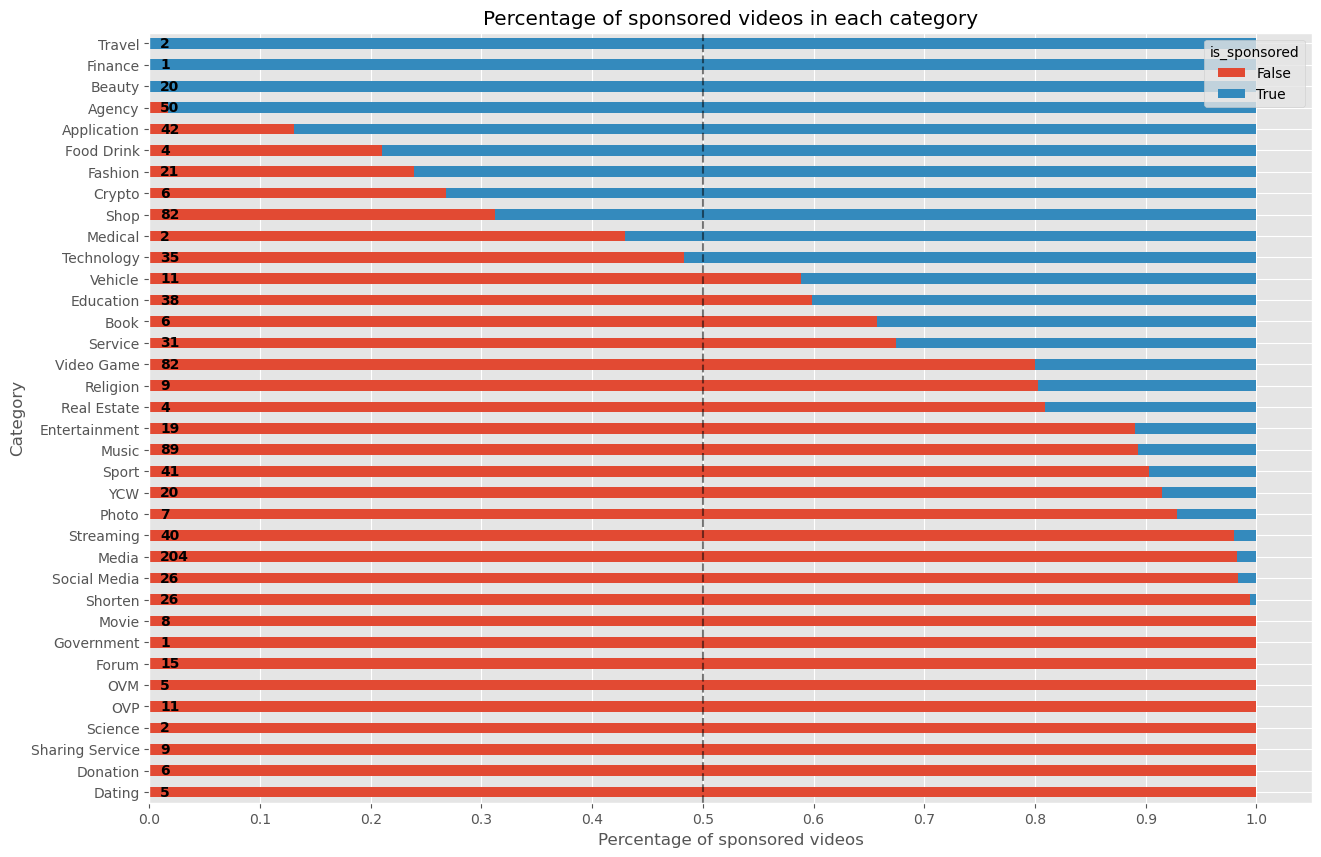

In [43]:
sponsoring_ratio.plot(kind="barh", stacked=True, figsize=(15, 10), title="Percentage of sponsored videos in each category")
plt.ylabel("Category")
plt.xlabel("Percentage of sponsored videos")
plt.axvline(x=0.5, color="black", linestyle="--", alpha=0.5)
plt.xticks(np.arange(0, 1.1, 0.1))
# show the number of entries for each category besides the name
for i, v in enumerate(sponsoring_ratio.index):
    plt.text(0.01, i, domains_top_classified[domains_top_classified.domain_category == v].count().values[0], color='black', va='center', fontweight='bold')
plt.show()

We can see that the `Travel`, `Finance` and `Beauty` categories are the ones that only appears as sponsor in videos. However, as we can see just above, the `Travel` and `Finance` categories are not relevant as they only account for 3 entries in the dataset. Note that the above graph takes into account the video count.

In [28]:
# Do the weighted average of the median_sponsor_score for each category
domains_top_classified["weighted_median_sponsor_score"] = domains_top_classified["median_sponsor_score"] * domains_top_classified["count"]
weighted_domains_top_classified = domains_top_classified.groupby("domain_category")[["weighted_median_sponsor_score", "count"]].sum()
weighted_domains_top_classified["weighted_median_sponsor_score"] = weighted_domains_top_classified["weighted_median_sponsor_score"] / weighted_domains_top_classified["count"]
weighted_domains_top_classified["weighted_median_sponsor_score"].sort_values(ascending=False).head(10)

domain_category
Beauty        14.817462
Travel        13.000000
Vehicle       12.323568
Food Drink     9.518328
Government     9.000000
Finance        9.000000
Religion       8.707868
Shop           8.358806
YCW            8.223012
Education      8.085043
Name: weighted_median_sponsor_score, dtype: float64

We can see that the `Beauty` category is the one that has the highest median sponsor score. This makes sense as beauty products are often advertised to be bought and as our sponsor vocaulary containes a lot of shopping related words (such as buy, get, free, purchase, etc.).

In [41]:
sp_domains = domains_top_classified[domains_top_classified.is_sponsored]
nsp_domains = domains_top_classified[~domains_top_classified.is_sponsored]

In [95]:
# Count the number of videos containing a link of a specific category
classified_sp_domains_cnt = sp_domains.groupby("domain_category")["count"].sum().sort_values(ascending=False)[:10]
classified_nsp_domains_cnt = nsp_domains.groupby("domain_category")["count"].sum().sort_values(ascending=False)[:10]

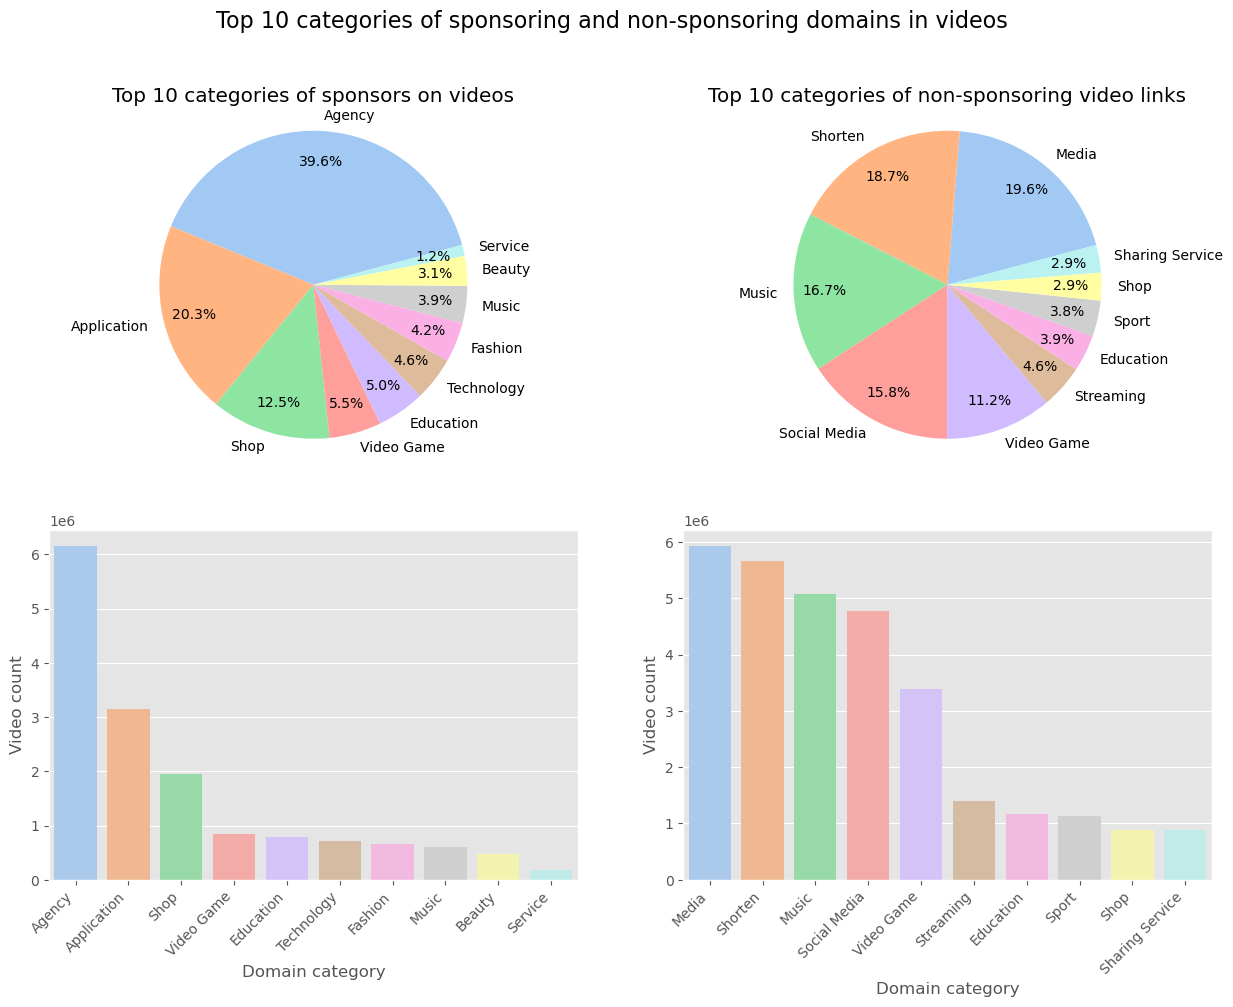

In [129]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle("Top 10 categories of sponsoring and non-sponsoring domains in videos", fontsize=16)

ax1.set_title("Top 10 categories of sponsors on videos")
ax1.pie(classified_sp_domains_cnt, labels=classified_sp_domains_cnt.index, autopct="%1.1f%%", colors=colors, radius=1.1, pctdistance=0.8, startangle=15)

ax2.set_title("Top 10 categories of non-sponsoring video links")
ax2.pie(classified_nsp_domains_cnt, labels=classified_nsp_domains_cnt.index, autopct="%1.1f%%", colors=colors, radius=1.1, pctdistance=0.8, startangle=15)

sns.barplot(x=classified_sp_domains_cnt.reset_index()["domain_category"].to_numpy(), y=classified_sp_domains_cnt, ax=ax3, palette=colors)
ax3.set(xlabel='Domain category', ylabel='Video count')
plt.setp(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')

sns.barplot(x=classified_nsp_domains_cnt.reset_index()["domain_category"].to_numpy(), y=classified_nsp_domains_cnt, ax=ax4, palette=colors)
ax4.set(xlabel='Domain category', ylabel='Video count')
plt.setp(ax4.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

Compared to the plots found in [the domains analysis](../analysis/domains_analysis.ipynb), we can see that the `Agency` category of domains is the one that occurs in the most videos and by a significant amount. We can conclude that videos are generally sponsored by sponsoring agencies rather than direct products or services. This gives us a better understanding of the nature of sponsored videos.

We were baffeled by this discovery. Indeed, many of the potential sponsors that we thought of did not appear in this list (for example, one might think about [NordVPN](https://nordvpn.com/) or [Brilliant](https://brilliant.org/)). We would not have thought that videos were in general sponsored by sponsoring agencies.